# CARES Act Recipients

<p> On March 27, 2020, the CARES (Coronavirus Aid, Relief, and Economic Security) Act was passed to combat the economic impact of COVID-19 in the United States. The $2 trillion law used a wide array of programs to reach individuals and organizations, including a stimulus check sent directly to eligible individuals. 

<p>Among the programs were a series of grants and loans that were awarded to public and private businesses as well as non-profit organizations (primarily hospitals). In order to qualify for assistance, organizations had to    </p>

<p> Using the COVID Stimulus Watch data provided by Good Jobs First [found here](https://data.covidstimuluswatch.org/prog.php?detail=refund), we can a take a look at the recipients of the various forms of awards and award amounts given through the CARES Act. </p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go

#df = pd.read_csv('C:/Users/Geoffery George/Documents/baby steps/Data Science/Covid_Stimulus/covidstimulus.csv')
#df = pd.read_csv('C:/Users/geoff/Documents/GitHub/CARES-Stimulus/covidstimulus.csv') #laptop
df = pd.read_csv('C:/Users/Geoffery George/Documents/GitHub/CARES-Stimulus/covidstimulus.csv') #desktop
#https://data.covidstimuluswatch.org/prog.php?&detail=export_csv

## Data

Let's take a quick look at our data. Using the 'head' and 'dtypes' commands allows us to preview the layout and values of our data as well as the properties of each value

In [2]:
df.head()

,Recipient Company,Parent Company,Award Date,Award Type,Grant Amount,Face Loan Amount,Awarding Agency,Program Name,Award Details,Data Source for Award,...,Parent Employment-related Penalties Since 2010,Parent Federal Corporate Income Tax Rate,"Parent Total Federal, State, and Local Subsidies Since 2010",Parent Government-contracting-related Penalties Since 2010,Parent Environmental / Healthcare / Safety Penalties Since 2010,Parent Consumer Protection / Financial / Competition-related Penaties Since 2010,Parent Ratio of CEO Pay to that of Average Worker,CEO Pay,Median Worker Pay,Parent TARP Loans Received During Financial Crisis
0,1000 Executive Parkway,1000 Executive Parkway,20200506,grant,"$556,206",$0,Health and Human Services Department,Public Health and Social Services Emergency Fu...,NaN,https://data.cdc.gov/Administrative/HRSA-Provi...,...,0,NaN,0,0,0,0,NaN,$0,$0,0
1,1046 North Point,1046 North Point,20200506,grant,"$509,767",$0,Health and Human Services Department,Public Health and Social Services Emergency Fu...,NaN,https://data.cdc.gov/Administrative/HRSA-Provi...,...,0,NaN,0,0,0,0,NaN,$0,$0,0
2,150 Riverside Op Llc,150 Riverside Op Llc,20200506,grant,"$1,693,362",$0,Health and Human Services Department,Public Health and Social Services Emergency Fu...,NaN,https://data.cdc.gov/Administrative/HRSA-Provi...,...,0,NaN,0,0,0,0,NaN,$0,$0,0
3,21st Century Oncology,21st Century Oncology,20200506,grant,"$12,097,933",$0,Health and Human Services Department,Public Health and Social Services Emergency Fu...,NaN,https://data.cdc.gov/Administrative/HRSA-Provi...,...,0,NaN,0,80450000,0,2300000,NaN,$0,$0,0
4,"22nd Century Group, Inc.","22nd Century Group, Inc.",20200501,loan,$0,"$1,200,000",Small Business Administration,Paycheck Protection Program,NaN,https://www.sec.gov/Archives/edgar/data/134785...,...,0,NaN,0,0,0,0,NaN,"$1,007,291",$0,0


In [3]:
df.dtypes

Recipient Company                                                                    object
Parent Company                                                                       object
Award Date                                                                            int64
Award Type                                                                           object
Grant Amount                                                                         object
Face Loan Amount                                                                     object
Awarding Agency                                                                      object
Program Name                                                                         object
Award Details                                                                        object
Data Source for Award                                                                object
Facility Name                                                                   

The columns 'Face Loan Amount' and 'Grant Amount' should be numbers, but are listed as objects in the DataFrame. <br>If we want to be able to calculate values (sums, averages, etc.), we need to first remove the '$' and ',' and then convert the values to numbers:</br>

In [4]:
#remove dollar sign and commas, convert to float
df['Grant Amount'] = df['Grant Amount'].str.replace('$','')
df['Grant Amount'] = df['Grant Amount'].str.replace(',','')
df['Grant Amount'] = pd.to_numeric(df['Grant Amount'],errors='coerce') #'coerce' sets error as NaN


In [5]:
#do the same for Face Loan Amounts
df['Face Loan Amount'] = df['Face Loan Amount'].str.replace('$','')
df['Face Loan Amount'] = df['Face Loan Amount'].str.replace(',','')
df['Face Loan Amount'] = pd.to_numeric(df['Face Loan Amount'],errors='coerce')

We have the totals for grants and loans awarded, but we may need to use the sum of both.
<br>'Award Amonut' can be created by adding 'Face Loan Amount' and 'Grant Amount'</br>

In [6]:
#creating one column makes calculating totals easier

df['Award Amount'] = df['Face Loan Amount'] + df['Grant Amount']
df['Award Amount']

0         556206
1         509767
2        1693362
3       12097933
4        1200000
          ...   
5774     1428745
5775      121700
5776      527360
5777     1610000
5778     2943171
Name: Award Amount, Length: 5779, dtype: int64

Let's call df.head() to see what changes have been made to the DataFrame:

In [7]:
df.head()

,Recipient Company,Parent Company,Award Date,Award Type,Grant Amount,Face Loan Amount,Awarding Agency,Program Name,Award Details,Data Source for Award,...,Parent Federal Corporate Income Tax Rate,"Parent Total Federal, State, and Local Subsidies Since 2010",Parent Government-contracting-related Penalties Since 2010,Parent Environmental / Healthcare / Safety Penalties Since 2010,Parent Consumer Protection / Financial / Competition-related Penaties Since 2010,Parent Ratio of CEO Pay to that of Average Worker,CEO Pay,Median Worker Pay,Parent TARP Loans Received During Financial Crisis,Award Amount
0,1000 Executive Parkway,1000 Executive Parkway,20200506,grant,556206,0,Health and Human Services Department,Public Health and Social Services Emergency Fu...,NaN,https://data.cdc.gov/Administrative/HRSA-Provi...,...,NaN,0,0,0,0,NaN,$0,$0,0,556206
1,1046 North Point,1046 North Point,20200506,grant,509767,0,Health and Human Services Department,Public Health and Social Services Emergency Fu...,NaN,https://data.cdc.gov/Administrative/HRSA-Provi...,...,NaN,0,0,0,0,NaN,$0,$0,0,509767
2,150 Riverside Op Llc,150 Riverside Op Llc,20200506,grant,1693362,0,Health and Human Services Department,Public Health and Social Services Emergency Fu...,NaN,https://data.cdc.gov/Administrative/HRSA-Provi...,...,NaN,0,0,0,0,NaN,$0,$0,0,1693362
3,21st Century Oncology,21st Century Oncology,20200506,grant,12097933,0,Health and Human Services Department,Public Health and Social Services Emergency Fu...,NaN,https://data.cdc.gov/Administrative/HRSA-Provi...,...,NaN,0,80450000,0,2300000,NaN,$0,$0,0,12097933
4,"22nd Century Group, Inc.","22nd Century Group, Inc.",20200501,loan,0,1200000,Small Business Administration,Paycheck Protection Program,NaN,https://www.sec.gov/Archives/edgar/data/134785...,...,NaN,0,0,0,0,NaN,"$1,007,291",$0,0,1200000


## Programs

Now we will take a look at the different programs offering grants and loans. The code below allows us to split each program by their award type (grant or loan) and the number of organizations receiving each program.

In [15]:
df.groupby(['Award Type','Program Name'])['Recipient Company'].count().sort_values(ascending=False)

Award Type  Program Name                                                           
grant       Public Health and Social Services Emergency Fund (Provider Relief Fund)    4950
            Provider Relief Fund COVID-19 High-Impact Payments                          395
loan        Paycheck Protection Program                                                 390
            Payroll Support Program                                                      11
grant       Higher Education Emergency Relief Fund (for-profits only)                    11
            Payroll Support Program                                                      10
loan        Medicare Accelerated and Advance Payment Program                              7
grant       Economic Injury Disaster Loan Emergency Advance                               4
loan        Economic Relief Program                                                       1
Name: Recipient Company, dtype: int64

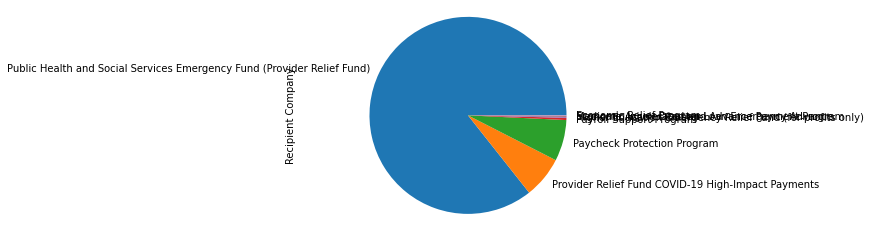

In [9]:
df.groupby('Program Name')['Recipient Company'].count().sort_values(ascending=False).plot.pie()
plt.axis('equal')
plt.show()

In [16]:
df.groupby('Ownership Structure')['Recipient Company'].count()

Ownership Structure
non-profit         1819
privately held     3487
publicly traded     473
Name: Recipient Company, dtype: int64

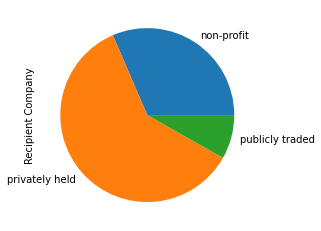

In [17]:
df.groupby('Ownership Structure')['Recipient Company'].count().plot.pie()

In [18]:
df.groupby('Ownership Structure')['Award Amount'].sum()

Ownership Structure
non-profit         18948962869
privately held      7766577700
publicly traded    27282920808
Name: Award Amount, dtype: int64

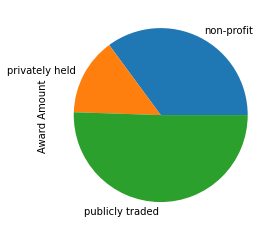

In [20]:
df.groupby('Ownership Structure')['Award Amount'].sum().plot.pie()

In [21]:
df.groupby('Program Name')['Award Amount'].sum().sort_values(ascending=False)

Program Name
Payroll Support Program                                                    22757000000
Public Health and Social Services Emergency Fund (Provider Relief Fund)    15948110790
Provider Relief Fund COVID-19 High-Impact Payments                         12000000008
Medicare Accelerated and Advance Payment Program                            1866200000
Paycheck Protection Program                                                 1023970074
Economic Relief Program                                                      364000000
Higher Education Emergency Relief Fund (for-profits only)                     39144505
Economic Injury Disaster Loan Emergency Advance                                  36000
Name: Award Amount, dtype: int64

In [22]:
px.pie(df,names='Program Name',values='Award Amount')

## Companies
Let's look at the companies receiving awards through the Payroll Support Program

In [23]:
df[df['Program Name']=='Payroll Support Program']

,Recipient Company,Parent Company,Award Date,Award Type,Grant Amount,Face Loan Amount,Awarding Agency,Program Name,Award Details,Data Source for Award,...,Parent Federal Corporate Income Tax Rate,"Parent Total Federal, State, and Local Subsidies Since 2010",Parent Government-contracting-related Penalties Since 2010,Parent Environmental / Healthcare / Safety Penalties Since 2010,Parent Consumer Protection / Financial / Competition-related Penaties Since 2010,Parent Ratio of CEO Pay to that of Average Worker,CEO Pay,Median Worker Pay,Parent TARP Loans Received During Financial Crisis,Award Amount
127,Omni Air International,Air Transport Services Group,20200505,grant,67000000,0,Treasury Department,Payroll Support Program,NaN,https://www.sec.gov/Archives/edgar/data/894081...,...,NaN,2650326,0,660791,0,60 to 1,"$3,183,736","$52,972",0,67000000
137,"Alaska Airlines, Inc. and Horizon Air Industri...",Alaska Air,20200423,grant,725000000,0,Treasury Department,Payroll Support Program,"Alaska Airlines and Horizon Air, subsidiaries ...",https://newsroom.alaskaair.com/2020-04-23-Alas...,...,-0.90%,104928413,0,6196729,675000,85.8 to 1,"$5,533,320","$64,528",0,725000000
138,"Alaska Airlines, Inc. and Horizon Air Industri...",Alaska Air,20200423,loan,0,267000000,Treasury Department,Payroll Support Program,"Alaska Airlines and Horizon Air, subsidiaries ...",https://newsroom.alaskaair.com/2020-04-23-Alas...,...,-0.90%,104928413,0,6196729,675000,85.8 to 1,"$5,533,320","$64,528",0,267000000
162,Allegiant Air,Allegiant Air,20200420,grant,86000000,0,Treasury Department,Payroll Support Program,Allegiant announced it would receive a grant o...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,...,NaN,1299000,0,2003501,610000,57 to 1,"$2,850,307","$50,047",0,86000000
163,Allegiant Air,Allegiant Air,20200421,loan,0,21000000,Treasury Department,Payroll Support Program,Allegiant announced it would receive a $21 mil...,http://ir.allegiantair.com/news-releases/news-...,...,NaN,1299000,0,2003501,610000,57 to 1,"$2,850,307","$50,047",0,21000000
200,American Airlines,American Airlines,20200414,grant,4100000000,0,Treasury Department,Payroll Support Program,American Airlines announced it would receive $...,http://news.aa.com/news/news-details/2020/Amer...,...,NaN,72728542,22100000,79705372,5540000,195 to 1,"$11,999,517","$61,527",0,4100000000
201,American Airlines,American Airlines,20200414,loan,0,1700000000,Treasury Department,Payroll Support Program,American Airlines announced it would receive $...,http://news.aa.com/news/news-details/2020/Amer...,...,NaN,72728542,22100000,79705372,5540000,195 to 1,"$11,999,517","$61,527",0,1700000000
1358,"Delta Air Lines, Inc.",Delta Air Lines,20200420,grant,3800000000,0,Treasury Department,Payroll Support Program,Delta received a total of $5.4 billion in assi...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,...,-3.70%,4451911,0,2415787,42720000,184 to 1,"$14,982,448","$81,355",0,3800000000
1359,"Delta Air Lines, Inc.",Delta Air Lines,20200420,loan,0,1600000000,Treasury Department,Payroll Support Program,Delta received a total of $5.4 billion in assi...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,...,-3.70%,4451911,0,2415787,42720000,184 to 1,"$14,982,448","$81,355",0,1600000000
2061,Hawaiian Airlines,Hawaiian Holdings,20200414,grant,233000000,0,Treasury Department,Payroll Support Program,Hawaiian Holdings announced it would receive a...,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,...,NaN,0,0,1347839,285000,45.9 to 1,"$3,196,153","$69,565",0,233000000
